# Make the Figures For the Report

In [1]:
import torch

# Check if CUDA is available and if PyTorch is using GPU
if torch.cuda.is_available():
    print(f"CUDA is available. Using GPU: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available. Using CPU.")
    
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
print(device)

if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print(torch.cuda.memory_summary(device=0, abbreviated=False))



CUDA is available. Using GPU: NVIDIA GeForce RTX 3080
cuda:1
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |
|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |
|  

## Get Plot of eccentricity

In [2]:
from rnn_model import MNISTRNN

checkpoint_path = "models/2024-12-03_16-53-55/checkpoint_16.pth"

# Hyperparameters
image_size = 100
hidden_size = 512
num_layers = 2
num_classes = 10
batch_size = 64
learning_rate = 0.0002
num_epochs = 100
num_steps = 3  # RNN steps per image
num_kernels = 12*12

model = MNISTRNN(image_size, hidden_size, num_layers, num_classes, num_kernels, device)
model.to(device)

# Load the checkpoint
checkpoint = torch.load(checkpoint_path)

# Load the state dictionary into the model
model.load_state_dict(checkpoint['model_state_dict'])

/tmp/ipykernel_67210/3607179454.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


<All keys matched successfully>

In [3]:
mus = model.eyes.mu
sigmas = model.eyes.sigma
print(sigmas.shape, mus.shape)
print(mus)

torch.Size([144]) torch.Size([144, 2])
Parameter containing:
tensor([[-0.6518, -0.6089],
        [-0.6364, -0.4645],
        [-0.5797, -0.3360],
        [-0.6825, -0.2849],
        [-0.6225, -0.1421],
        [-0.6707, -0.0251],
        [-0.5782,  0.0627],
        [-0.6966,  0.1489],
        [-0.6088,  0.2323],
        [-0.6299,  0.3512],
        [-0.6553,  0.4947],
        [-0.6226,  0.6165],
        [-0.4956, -0.6277],
        [-0.4805, -0.4649],
        [-0.4453, -0.3453],
        [-0.5157, -0.2229],
        [-0.4366, -0.1341],
        [-0.4977, -0.0586],
        [-0.4614,  0.0364],
        [-0.4544,  0.1372],
        [-0.4744,  0.2568],
        [-0.4498,  0.3569],
        [-0.4816,  0.4719],
        [-0.4401,  0.5921],
        [-0.3323, -0.6629],
        [-0.3658, -0.4858],
        [-0.3159, -0.3576],
        [-0.3660, -0.2612],
        [-0.3319, -0.1565],
        [-0.3324, -0.0410],
        [-0.3316,  0.0520],
        [-0.3455,  0.1383],
        [-0.3178,  0.2301],
        [-0.334

[2.3951716 2.1814513 2.1610906 2.2399979 2.1982362 2.154414  2.1668925
 2.2436788 2.1735165 2.2066188 2.239594  2.4307072 2.3055408 2.1179652
 2.0731435 2.0848699 2.0674734 2.1526601 2.059047  2.1277523 2.1272984
 2.1764874 2.2234344 2.2808084 2.244536  2.068168  2.065134  2.0382586
 2.0445192 2.024106  2.1111124 2.0521946 2.0839753 2.0487154 2.1781018
 2.3881779 2.0748272 2.0796914 2.0308065 2.0374706 2.0390959 1.9540775
 2.0099561 2.0122843 1.8676234 1.9486663 2.0460567 2.1591437 2.21858
 2.0568075 2.0347428 2.0962515 2.0437317 1.9168013 1.9398441 1.9114823
 1.8505274 1.9542572 2.0976727 2.3162603 2.1061049 2.1032786 2.022003
 2.0752976 2.027459  1.9567256 1.8905122 1.7879257 1.7659166 1.8950341
 2.007338  2.224484  2.201745  2.08646   2.0532553 2.008152  1.9955897
 1.893492  1.880136  1.6631366 1.8314282 1.8541347 2.0573285 2.270889
 2.136094  2.0597794 2.0528655 2.03949   1.998954  1.951601  1.8755158
 1.8150487 1.8347628 1.9807627 2.0254128 2.2397597 2.261433  2.045169
 1.9952435 

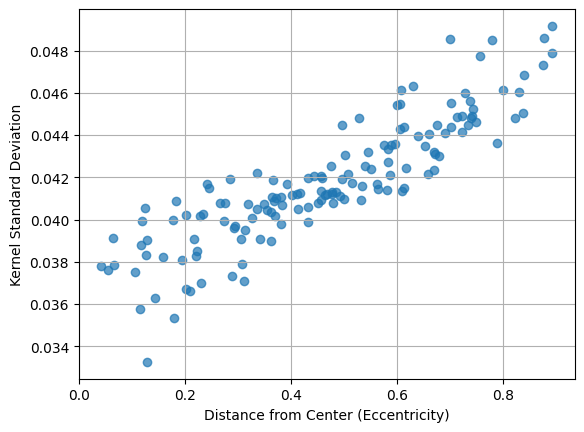

In [5]:
import matplotlib.pyplot as plt
mus = model.eyes.mu
sigmas = model.eyes.sigma
distances = torch.norm(mus, dim=1)

distances = distances.detach().cpu().numpy()
sigmas = sigmas.detach().cpu().numpy() 
print(sigmas)
sigmas = sigmas/50

# Plot distances (x-axis) vs sigmas (y-axis)
plt.scatter(distances, sigmas, alpha=0.7)
plt.xlabel('Distance from Center (Eccentricity)')
plt.ylabel('Kernel Standard Deviation')
# plt.title('Distance from Center (Eccentricity)')
plt.grid(True)
plt.show()


## Get The Test Accuracy, Precision, Recall, Model Parameters Size, 

In [8]:
import torch
from rnn_model import MNISTRNN

checkpoint_path = "models/2024-12-03_16-53-55/checkpoint_39.pth" #31 is 94.13%

# Hyperparameters
image_size = 100
hidden_size = 512
num_layers = 2
num_classes = 10
batch_size = 64
learning_rate = 0.0002
num_epochs = 100
num_steps = 3  # RNN steps per image
num_kernels = 12*12

model = MNISTRNN(image_size, hidden_size, num_layers, num_classes, num_kernels, device)
model.to(device)

# Load the checkpoint
checkpoint = torch.load(checkpoint_path)

# Load the state dictionary into the model
model.load_state_dict(checkpoint['model_state_dict'])

/tmp/ipykernel_65526/1664891468.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


<All keys matched successfully>

In [3]:
# Evaluate on the test set
from dataloaders import get_dataloaders
train_loader, test_loader = get_dataloaders()

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        batch_size = images.size(0)
        h0 = torch.zeros(num_layers, batch_size, hidden_size).to(images.device)
        next_actions = torch.zeros((batch_size, 3), device=images.device)
        
        for step in range(num_steps):
            class_pred, action_pred, h0, sensor_readings = model(images, next_actions, h0)
            
            next_actions = action_pred

        # print(class_pred.data)
        _, predicted = torch.max(class_pred.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # if total > 10000:
        #     break
        

    print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

Accuracy of the model on the test images: 91.93%


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming get_dataloaders() provides train and test loaders
train_loader, test_loader = get_dataloaders()

model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    correct = 0
    total = 0
    
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        batch_size = images.size(0)
        h0 = torch.zeros(num_layers, batch_size, hidden_size).to(images.device)
        next_actions = torch.zeros((batch_size, 3), device=images.device)
        
        for step in range(num_steps):
            class_pred, action_pred, h0, sensor_readings = model(images, next_actions, h0)
            next_actions = action_pred

        _, predicted = torch.max(class_pred.data, 1)
        
        # Append for metric calculations
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())
        
        # Accuracy calculation
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

# Calculate precision, recall, and F1-score
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy of the model on the test images: 91.93%
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


In [10]:
# Count the number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Number of trainable parameters: {count_parameters(model):,}")

Number of trainable parameters: 869,309


## Do a few Rollouts

In [12]:
from glimpse import plot_glimpse_image

with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        batch_size = images.size(0)

        # Initialize the hidden state and center
        h0 = torch.zeros(num_layers, batch_size, hidden_size).to(images.device)
        
        next_actions = torch.zeros((batch_size, 3), device=images.device)
        # next_actions[:, 2]=1 # Set the s_z to be 1

        loss = 0
        for step in range(num_steps):
            # Print the image out
            
            # next_actions = torch.zeros_like(next_actions, device=next_actions.device) #TODO: remove this line please
            # Forward pass    
            class_pred, action_pred, h0, sensor_readings = model(images, next_actions, h0)
            
            if (i + 1) % 1 == 0:
                sz = torch.ones((1), device=device)
                img = images[0][0]
                sc = next_actions[0][0:2] 
                # sz = (actions[:, 2] + 1)*3
                sz = (next_actions[0][2] + 1)
                img_name = f"iter{i+1}_step{step}.png"
                plot_glimpse_image(img_name, img, model.eyes.mu, model.eyes.sigma, sc, sz, sensor_readings[0])
                
            next_actions = action_pred
            
            # print(f"step{step}: memory update")
            # print("", torch.cuda.memory_summary(device='cuda:0'))